<a href="https://colab.research.google.com/github/addis0nl/plate_detector/blob/main/yolo_plates_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 9.2 MB/s eta 0:00:00


In [2]:
!curl -L "https://public.roboflow.com/ds/dur0pc4h2z?key=RXoccMgjrH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   3191      0 --:--:-- --:--:-- --:--:--  3192
100 10.2M  100 10.2M    0     0  18.0M      0 --:--:-- --:--:-- --:--:--  102M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.jpg  
 extracting: test/images/b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg  
 extracting: test/images/b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg  
 extracting: test/images/b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg  
 extracting: test/images/b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg  
 extracting: test/images/b3b61da98e22cd4a_jpg.rf.e5f31065702d6

# Train

/content
--2023-09-06 08:55:53--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Auckland_traffic_-_copyright-free_photo_released_to_public_domain.jpg/800px-Auckland_traffic_-_copyright-free_photo_released_to_public_domain.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159492 (156K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 155.75K  --.-KB/s    in 0.07s   

2023-09-06 08:55:53 (2.06 MB/s) - ‘cars.jpg’ saved [159492/159492]

100% 21.5M/21.5M [00:00<00:00, 163MB/s]
Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients

image 1/1 /content/cars.jpg: 448x640 33 cars, 1 bus, 1 truck, 78.8ms
Speed: 16.8ms preprocess, 78.8ms inference, 35.5ms pos

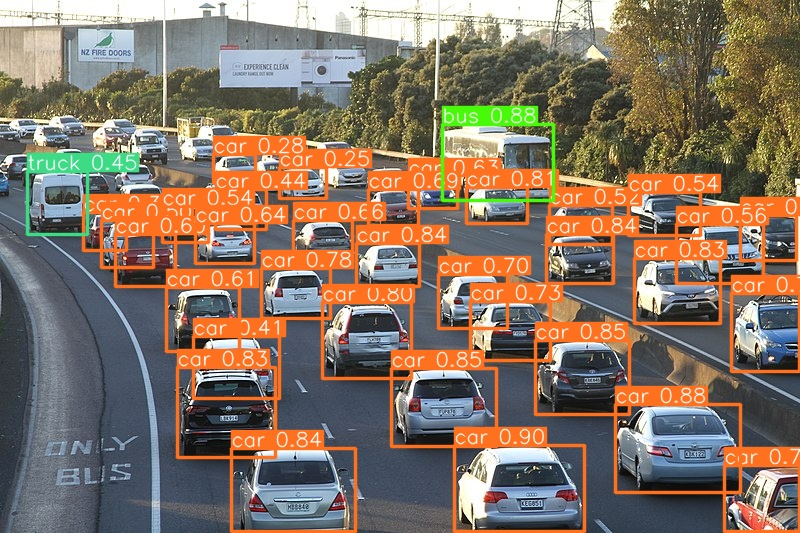

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
import os

HOME = os.getcwd()
%cd {HOME}

# Test pretrained on an image

!wget -O cars.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Auckland_traffic_-_copyright-free_photo_released_to_public_domain.jpg/800px-Auckland_traffic_-_copyright-free_photo_released_to_public_domain.jpg"
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source="cars.jpg" save=true
Image(filename='runs/detect/predict/cars.jpg')

In [4]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100

/content
Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

args.yaml					   train_batch1440.jpg
events.out.tfevents.1693990579.39792f2c85a4.434.0  train_batch1441.jpg
labels_correlogram.jpg				   train_batch1442.jpg
labels.jpg					   train_batch1.jpg
results.csv					   train_batch2.jpg
results.png					   weights
train_batch0.jpg
/content


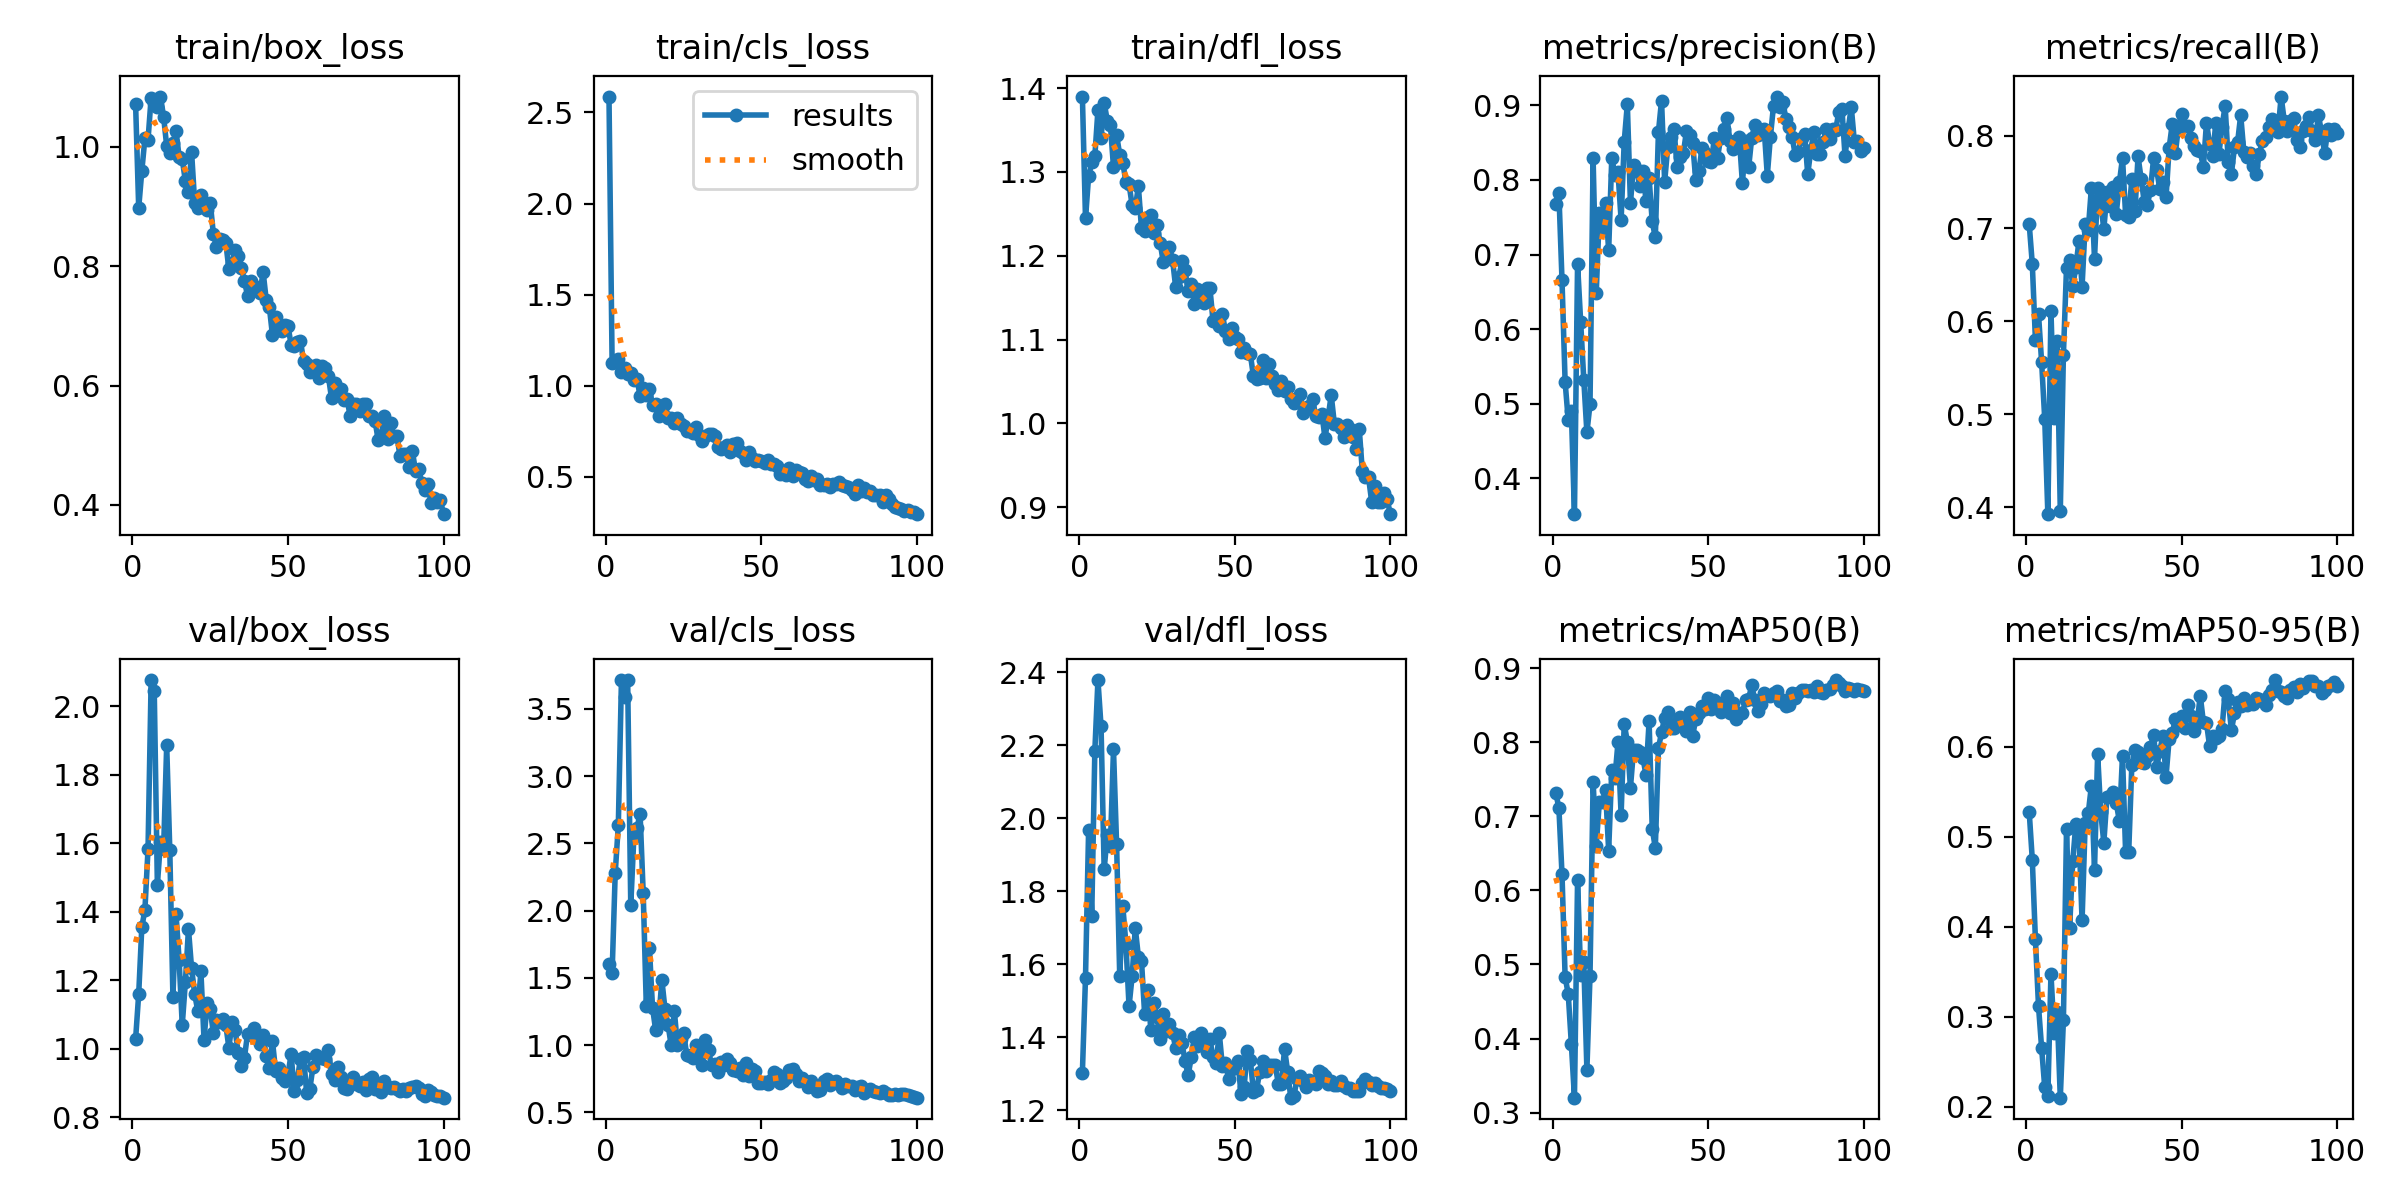

In [5]:
!ls {HOME}/runs/detect/train/
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.18it/s]
                   all         70        218      0.856      0.807      0.871      0.676
         license-plate         70         84      0.904      0.905      0.939      0.718
               vehicle         70        134      0.807      0.709      0.803      0.633
Speed: 6.5ms preprocess, 17.2ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val


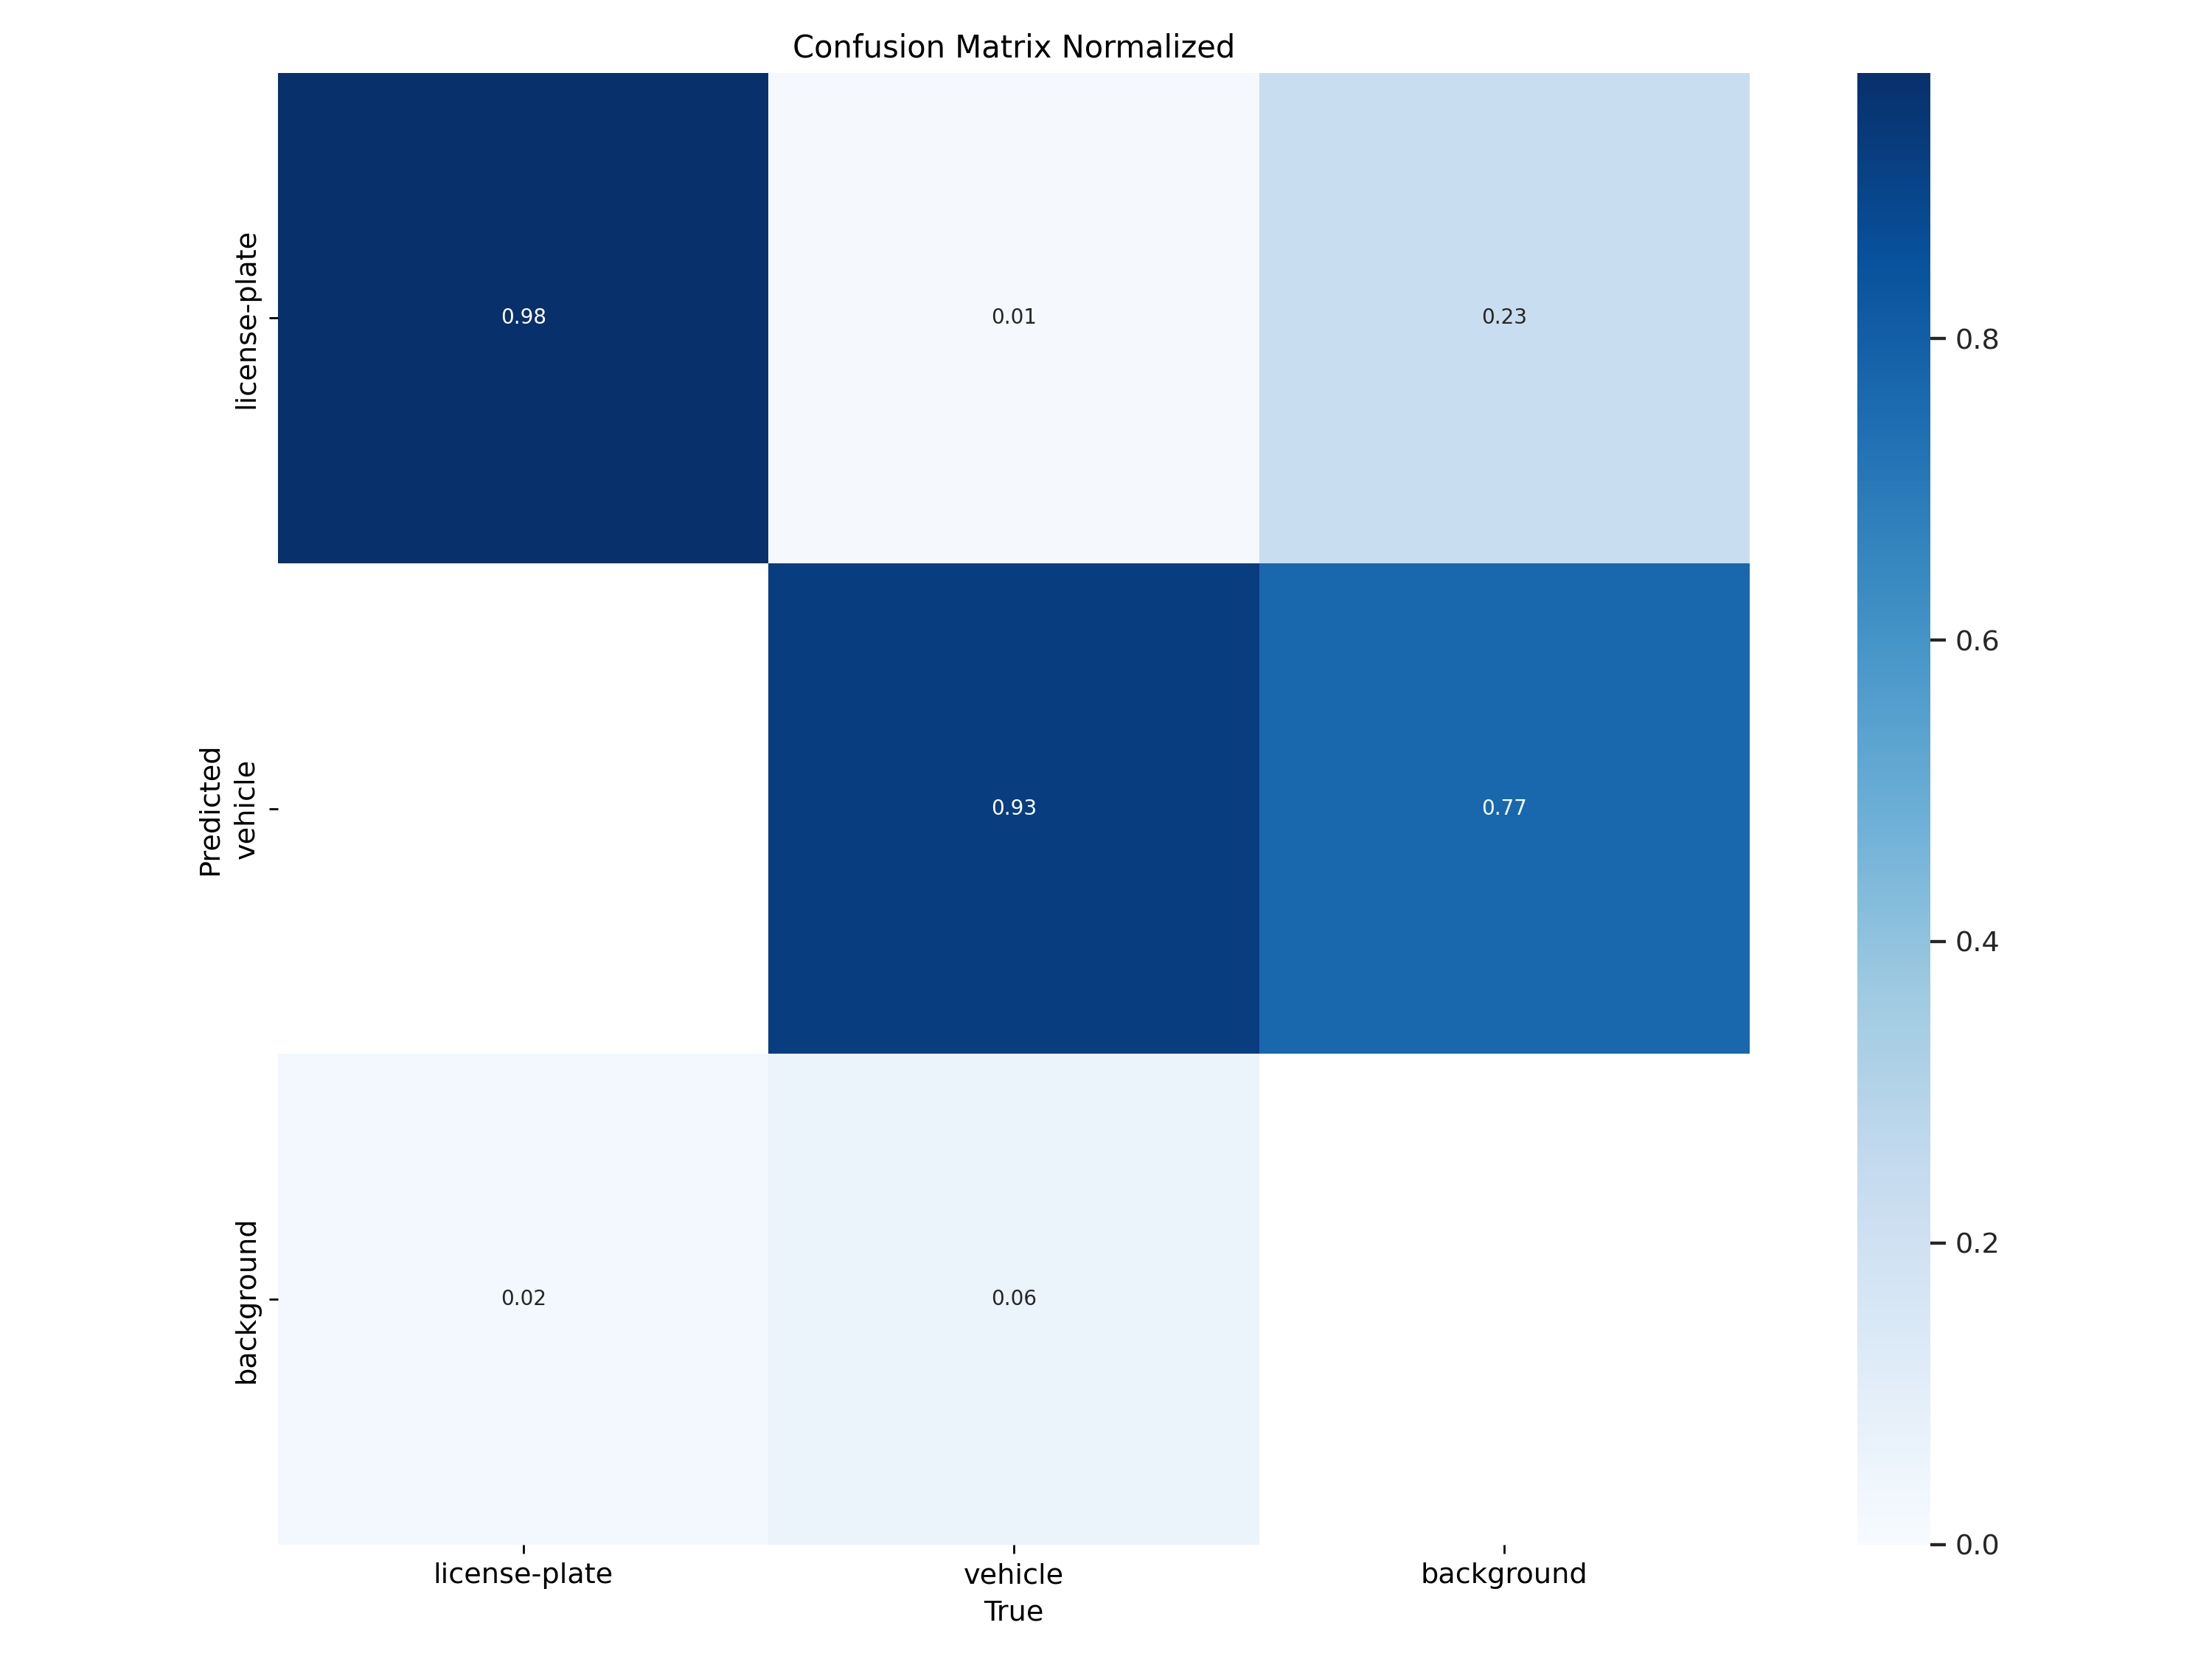

In [6]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=data.yaml
Image(filename='runs/detect/val/confusion_matrix_normalized.png')

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/1 /content/cars.jpg: 448x640 10 license-plates, 3 vehicles, 109.7ms
Speed: 3.5ms preprocess, 109.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


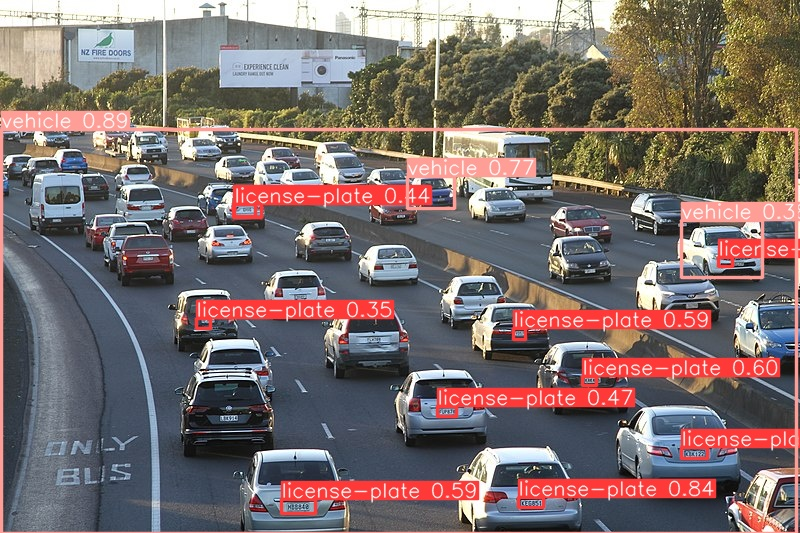

In [7]:
# retest on earlier image
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="cars.jpg" save=true
Image(filename='runs/detect/predict2/cars.jpg')

In [8]:
# download weights
from google.colab import files
files.download(f'{HOME}/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>